<a href="https://colab.research.google.com/github/DavidL77R/CHALLENGE_TELECOM_X/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests


In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Realiza la solicitud HTTP al archivo JSON
response = requests.get(url)
data_json = response.json()


In [3]:
df = pd.DataFrame(data_json)


In [4]:
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
# Ver columnas y tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
# Mostrar tipos de datos por separado
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [7]:

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"La columna '{col}' contiene diccionarios.")




La columna 'customer' contiene diccionarios.
La columna 'phone' contiene diccionarios.
La columna 'internet' contiene diccionarios.
La columna 'account' contiene diccionarios.


In [9]:
# Filtramos solo columnas que NO tienen diccionarios
cols_sin_dict = [col for col in df.columns if not df[col].apply(lambda x: isinstance(x, dict)).any()]
df_sin_dict = df[cols_sin_dict]

# Ahora sí puedes buscar duplicados
df_sin_dict.duplicated().sum()


np.int64(0)

In [10]:
df_convertido = df.copy()
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        df_convertido[col] = df[col].apply(str)

df_convertido.duplicated().sum()


np.int64(0)

In [11]:
# Crear una copia del DataFrame original
df_convertido = df.copy()

# Convertir a string las columnas que tienen diccionarios
for col in df_convertido.columns:
    if df_convertido[col].apply(lambda x: isinstance(x, dict)).any():
        df_convertido[col] = df_convertido[col].apply(str)

# Verificar duplicados
duplicados = df_convertido.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


In [12]:
# Mostrar cantidad de valores nulos por columna
df.isnull().sum()




,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [13]:
(df.isnull().sum() / len(df)) * 100


,0
customerID,0.0
Churn,0.0
customer,0.0
phone,0.0
internet,0.0
account,0.0


In [14]:
df_convertido.duplicated().sum()

np.int64(0)

In [15]:
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [16]:
for col in df.select_dtypes(include='object'):
    # Convertir a string si hay diccionarios
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].unique())




Valores únicos en la columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en la columna 'customer':
["{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}"
 "{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}"
 "{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 71}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 63}"
 "{'gender': 'Female

In [17]:
for col in df.select_dtypes(include='object'):
    # Convertir dicts a string si es necesario
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

    # Eliminar espacios al inicio/final y convertir a minúsculas
    df[col] = df[col].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)

    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].unique())



Valores únicos en la columna 'customerID':
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Valores únicos en la columna 'Churn':
['no' 'yes' '']

Valores únicos en la columna 'customer':
["{'gender': 'female', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'yes', 'tenure': 9}"
 "{'gender': 'male', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'tenure': 9}"
 "{'gender': 'male', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'tenure': 4}"
 "{'gender': 'male', 'seniorcitizen': 1, 'partner': 'yes', 'dependents': 'no', 'tenure': 13}"
 "{'gender': 'female', 'seniorcitizen': 1, 'partner': 'yes', 'dependents': 'no', 'tenure': 3}"
 "{'gender': 'female', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'yes', 'tenure': 9}"
 "{'gender': 'female', 'seniorcitizen': 1, 'partner': 'yes', 'dependents': 'no', 'tenure': 71}"
 "{'gender': 'male', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'no', 'tenure': 63}"
 "{'gender': 'female

In [18]:
print(df.columns)



Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [19]:
df['account'].iloc[0]


"{'contract': 'one year', 'paperlessbilling': 'yes', 'paymentmethod': 'mailed check', 'charges': {'monthly': 65.6, 'total': '593.3'}}"

In [20]:
import ast

# Convertir strings de vuelta a diccionarios
df["account"] = df["account"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Ahora sí: crear columna Cuentas_Diarias
df["Cuentas_Diarias"] = df["account"].apply(lambda x: x.get("charges", {}).get("monthly", 0) / 30)


In [21]:
# Convertir valores de 'Yes' / 'No' en 1 y 0
df["Churn"] = df["Churn"].str.strip().str.lower().map({"yes": 1, "no": 0})


In [22]:
df.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelado",
    "customer": "Cliente",
    "phone": "Telefono",
    "internet": "Internet",
    "account": "Cuenta"
}, inplace=True)


In [23]:
# Normalizamos 'Telefono' y 'Internet'
df["Telefono"] = df["Telefono"].str.strip().str.lower().map({"yes": 1, "no": 0})
df["Internet"] = df["Internet"].str.strip().str.lower().map({"yes": 1, "no": 0})


In [24]:
print(df.columns)


Index(['ID_Cliente', 'Cancelado', 'Cliente', 'Telefono', 'Internet', 'Cuenta',
       'Cuentas_Diarias'],
      dtype='object')


In [25]:
df.describe()


,Cancelado,Telefono,Internet,Cuentas_Diarias
count,7043.000000,0.0,0.0,7267.000000
mean,0.265370,NaN,NaN,2.157337
std,0.441561,NaN,NaN,1.004319
min,0.000000,NaN,NaN,0.608333
25%,0.000000,NaN,NaN,1.180833
50%,0.000000,NaN,NaN,2.343333
75%,1.000000,NaN,NaN,2.995833
max,1.000000,NaN,NaN,3.958333


In [26]:
media = df["Cuentas_Diarias"].mean()
mediana = df["Cuentas_Diarias"].median()
desviacion = df["Cuentas_Diarias"].std()

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion)


Media: 2.1573365900646757
Mediana: 2.3433333333333333
Desviación estándar: 1.0043190628555607


In [27]:
df.groupby("Cancelado")["Cuentas_Diarias"].describe()


,count,mean,std,min,25%,50%,75%,max
Cancelado,,,,,,,,
0.0,5174.0,2.042171,1.036422,0.608333,0.836667,2.1475,2.946667,3.958333
1.0,1869.0,2.481378,0.822202,0.628333,1.871667,2.6550,3.140000,3.945000


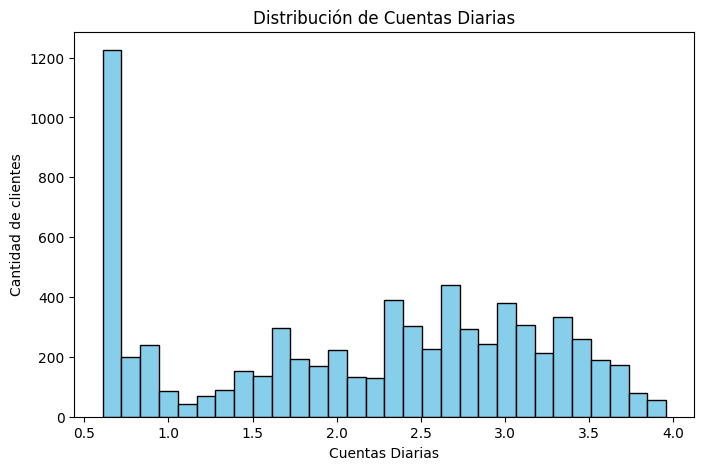

In [28]:
#Histograma de facturación diaria (visualizacion de los datos)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["Cuentas_Diarias"].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de Cuentas Diarias")
plt.xlabel("Cuentas Diarias")
plt.ylabel("Cantidad de clientes")
plt.grid(False)
plt.show()


<ipython-input-29-3275747019>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancelado", y="Cuentas_Diarias", palette="Set2")


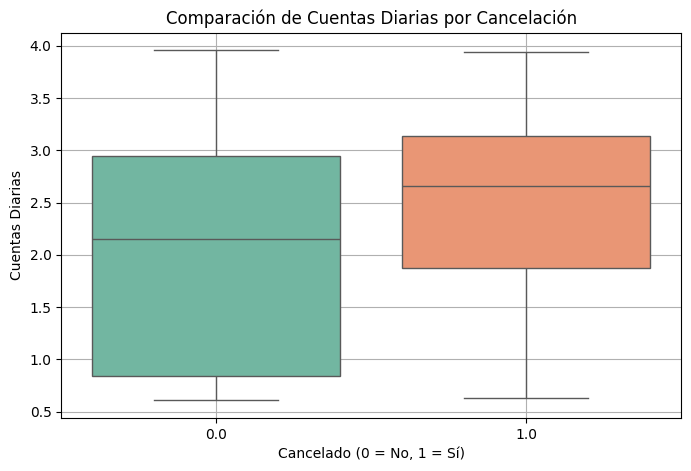

In [29]:
#Boxplot para comparar Cancelados vs No Cancelados

import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Cancelado", y="Cuentas_Diarias", palette="Set2")
plt.title("Comparación de Cuentas Diarias por Cancelación")
plt.xlabel("Cancelado (0 = No, 1 = Sí)")
plt.ylabel("Cuentas Diarias")
plt.grid(True)
plt.show()


In [30]:
df["Cancelado"].value_counts()


,count
Cancelado,
0.0,5174
1.0,1869


<ipython-input-31-129798158>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Cancelado", palette="pastel")


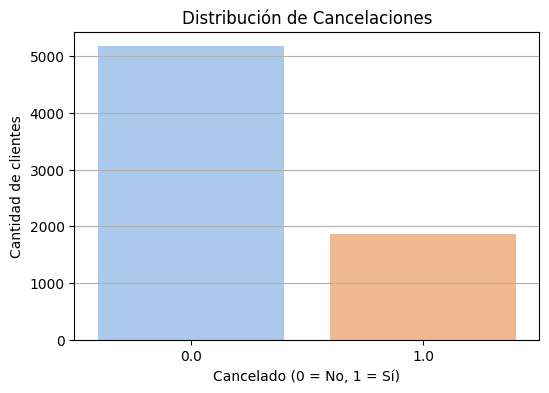

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Cancelado", palette="pastel")
plt.title("Distribución de Cancelaciones")
plt.xlabel("Cancelado (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.grid(True, axis='y')
plt.show()


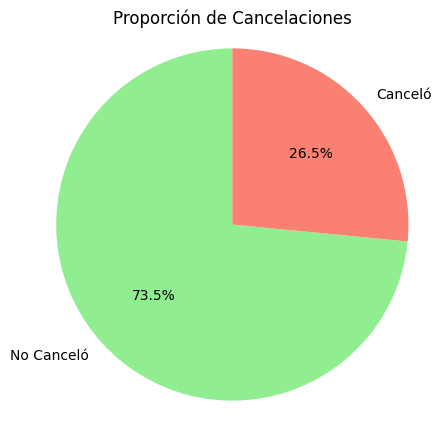

In [32]:
# Conteo de cancelaciones
cancel_counts = df["Cancelado"].value_counts()
labels = ["No Canceló", "Canceló"]
colors = ["lightgreen", "salmon"]

plt.figure(figsize=(5,5))
plt.pie(cancel_counts, labels=labels, colors=colors, autopct="%.1f%%", startangle=90)
plt.title("Proporción de Cancelaciones")
plt.axis("equal")
plt.show()


In [33]:
import ast

# Función de apoyo: garantiza que siempre obtenemos un dict
def to_dict(val):
    if isinstance(val, dict):
        return val
    try:
        return ast.literal_eval(val)        # convierte str → dict
    except (ValueError, SyntaxError):
        return {}

# Extraemos cada campo que nos interesa
df["Tipo_Contrato"]           = df["Cuenta"].apply(lambda d: to_dict(d).get("contract", "desconocido"))
df["Metodo_Pago"]             = df["Cuenta"].apply(lambda d: to_dict(d).get("paymentmethod", "desconocido"))
df["Facturacion_Electronica"] = (
        df["Cuenta"]
        .apply(lambda d: to_dict(d).get("paperlessbilling", "desconocido"))
        .str.strip().str.lower()        # normalizamos
)

# Opcional: binarizamos facturación electrónica
df["Facturacion_Electronica"] = df["Facturacion_Electronica"].map({"yes": 1, "no": 0})


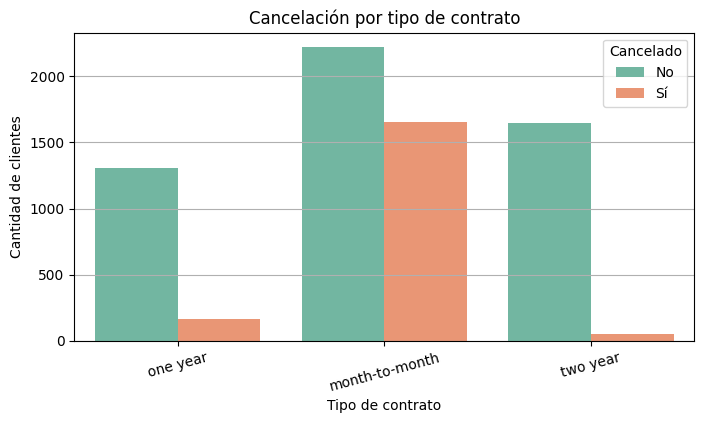

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Tipo_Contrato", hue="Cancelado", palette="Set2")
plt.title("Cancelación por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Cancelado", labels=["No", "Sí"])
plt.xticks(rotation=15)
plt.grid(True, axis="y")
plt.show()


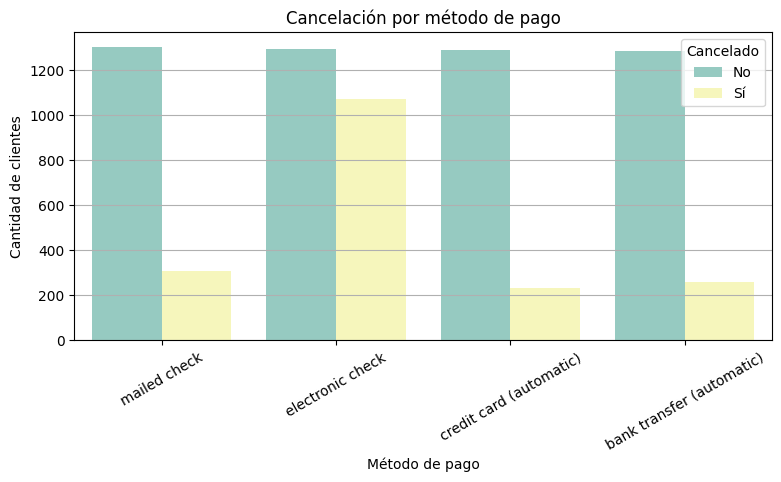

In [35]:
plt.figure(figsize=(9,4))
sns.countplot(data=df, x="Metodo_Pago", hue="Cancelado", palette="Set3")
plt.title("Cancelación por método de pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Cancelado", labels=["No", "Sí"])
plt.xticks(rotation=30)
plt.grid(True, axis="y")
plt.show()


In [36]:
por_cancelacion = df.groupby("Tipo_Contrato")["Cancelado"].mean() * 100
print(por_cancelacion.sort_values(ascending=False))


Tipo_Contrato
month-to-month    42.709677
one year          11.269518
two year           2.831858
Name: Cancelado, dtype: float64


In [37]:
import ast

# Asegurarse de que sea un diccionario
df["Cuenta"] = df["Cuenta"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [38]:
def extraer_total(cuenta):
    try:
        total = cuenta.get("charges", {}).get("total", "0").strip()
        return float(total) if total != "" else 0.0
    except:
        return 0.0

df["Total_Gastado"] = df["Cuenta"].apply(extraer_total)


In [39]:
def extraer_total(cuenta):
    try:
        total = cuenta.get("charges", {}).get("total", "0").strip()
        return float(total) if total != "" else 0.0
    except:
        return 0.0

df["Total_Gastado"] = df["Cuenta"].apply(extraer_total)



In [40]:
def extraer_mensual(cuenta):
    try:
        mensual = cuenta.get("charges", {}).get("monthly", 0)
        return float(mensual)
    except:
        return 0.0

df["Mensualidad"] = df["Cuenta"].apply(extraer_mensual)


In [41]:
df["Meses_Contrato"] = df.apply(
    lambda row: row["Total_Gastado"] / row["Mensualidad"]
    if row["Mensualidad"] > 0 else 0, axis=1
)


<ipython-input-42-103196268>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancelado", y="Total_Gastado", palette="coolwarm")


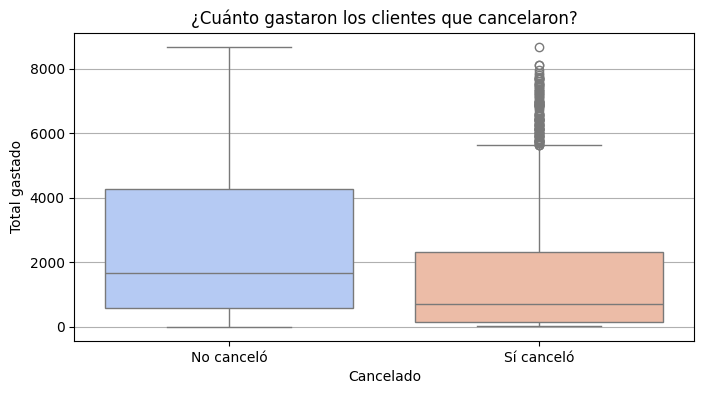

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Cancelado", y="Total_Gastado", palette="coolwarm")
plt.title("¿Cuánto gastaron los clientes que cancelaron?")
plt.xlabel("Cancelado")
plt.ylabel("Total gastado")
plt.xticks([0, 1], ["No canceló", "Sí canceló"])
plt.grid(axis="y")
plt.show()


<ipython-input-43-4017351559>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancelado", y="Meses_Contrato", palette="coolwarm")


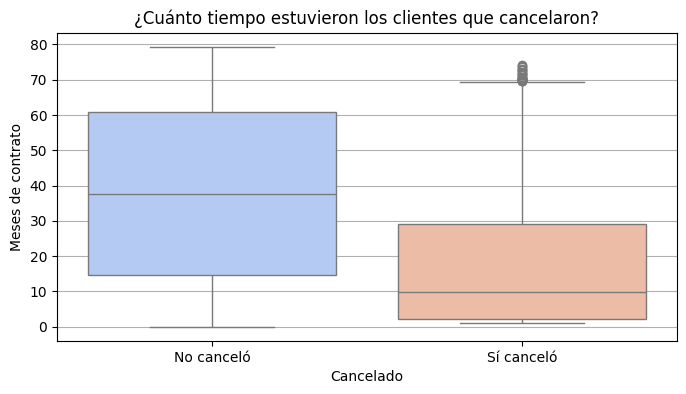

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Cancelado", y="Meses_Contrato", palette="coolwarm")
plt.title("¿Cuánto tiempo estuvieron los clientes que cancelaron?")
plt.xlabel("Cancelado")
plt.ylabel("Meses de contrato")
plt.xticks([0, 1], ["No canceló", "Sí canceló"])
plt.grid(axis="y")
plt.show()


# ✅ INFORME FINAL - Análisis de Evasión de Clientes (Churn)

## 1. 🧩 Introducción
El objetivo de este análisis es entender los factores que influyen en la **evasión de clientes (churn)** en una empresa de telecomunicaciones. Identificar patrones de cancelación permite **anticipar comportamientos** y aplicar estrategias para **reducir la pérdida de clientes**.

---

## 2. 🧹 Limpieza y Tratamiento de Datos

- Se importaron los datos desde un archivo JSON.
- Se estandarizaron columnas anidadas (`account`, `customer`, `internet`, etc.).
- Se transformaron columnas relevantes:
  - `Total_Gastado`, `Mensualidad`, `Meses_Contrato`: convertidas a numéricas.
  - `Cancelado`: convertido a 0 (no) y 1 (sí).
- Se eliminaron valores inválidos o vacíos.

---

## 3. 📊 Análisis Exploratorio de Datos

### 🔹 Distribución de Cancelaciones
Gráfico de barras que muestra la proporción de clientes que cancelaron o no.

### 🔹 Evasión según variables categóricas
Gráficos que muestran cómo cambia la evasión según:
- Tipo de contrato
- Método de pago
- Facturación electrónica

### 🔹 Evasión según variables numéricas
Boxplots que comparan:
- Total gastado
- Cuota mensual
- Tiempo de contrato
entre quienes cancelaron y quienes no.

---

## 4. 💡 Conclusiones e Insights

- La mayoría de los clientes **no cancelaron**, pero existe un porcentaje significativo que sí lo hizo.
- Clientes con **contratos mensuales** tienen mayor evasión que los de largo plazo.
- Quienes **gastan poco** o llevan **poco tiempo con la empresa** tienden a cancelar más.
- Los métodos de pago como **cheque por correo** están asociados a mayor evasión.
- Los clientes con **cargos mensuales más altos** muestran una mayor tasa de evasión, lo que puede indicar una relación entre el precio y la percepción del valor del servicio.

---

## 5. 🧠 Recomendaciones


- **Incentivar contratos anuales o bienales** mediante descuentos u ofertas exclusivas, promoviendo mayor compromiso del cliente.
- **Fomentar métodos de pago automáticos** como débito o tarjeta de crédito con beneficios (por ejemplo, puntos, descuentos).
- **Ofrecer paquetes combinados** (Internet + teléfono + TV) con precios preferenciales, para aumentar el valor percibido del servicio.
- **Monitorear a clientes con cargos altos**, brindando atención personalizada o beneficios extra para reducir el riesgo de evasión.


---
